# Data Analysis Process

## This is part of the lesson 'Data Analysis process' of Data Analysis Nanodegree program(DAND).

#### Short description for the tables used:
---- **enrollments**        : Data about a random subset of Data Analyst Nanodegree students who complete
                          their first project and a random subset of students who do not.
                       
---- **daily_engagement**   : Data about engagement within Data Analyst Nanodegree courses for each student in
                          the enrollment table on each day they were enrolled. Includes a record even if
                          there was no engagement that day. Includes engagement data from both the
                          supporting courses for the Nanodegree program, and the corresponding freely
                          available courses with the same content.
                       
---- **project_submissions**: Data about submissions for Data Analyst Nanodegree projects for each student in
                          the enrollment table.
                       
                       
                       

In [47]:
import unicodecsv

#Reads a csv file and converts it into dictionary using unicode and 
#returns the data as list
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [48]:
enrollments = read_csv('C:\\Users\\archa\\enrollments.csv')
daily_engagement = read_csv('C:\\Users\\archa\\daily_engagement.csv')
project_submissions = read_csv('C:\\Users\\archa\\project_submissions.csv')
#enrollments[0]
#daily_engagement[0]
#project_submissions[0]

#### Clean the data
   ---- Converts the string data to datetime or int or float appropriately

In [49]:
from datetime import datetime as dt

#Takes date as a string, and returns a Python datetime object.
#If there is no date given, returns None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
##Takes a string which is either an empty string or represents an integer, and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
#Clean up the data types in the enrollment table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
#enrollments[0]


for engagement in daily_engagement:
    engagement['utc_date'] = parse_date(engagement['utc_date'])
    engagement['lessons_completed'] = int(float(engagement['lessons_completed']))
    engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
    engagement['projects_completed'] = int(float(engagement['projects_completed']))
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
    
#daily_engagement[0]

for submission in project_submissions:
    submission['creation_date'] = parse_date(submission['creation_date'])
    submission['completion_date'] = parse_date(submission['completion_date'])
    
#project_submissions[0]


#### For each of the three files,find the total number of rows and the unique number of  students

In [50]:
#Rename account key column in daily_engagement so that a common function can be written to get 
#unique students in all the three files
for engagement_record in daily_engagement:   
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [51]:
#Define function to get unique students for all the files
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [52]:
len(enrollments)

1640

In [53]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [54]:
len(daily_engagement)

136240

In [55]:
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [56]:
len(project_submissions)

3642

In [57]:
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

#### Identifying missing unique daily students(1237) from enrollment(1302)

In [58]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment     # We could see that the 'days_to_cancel' field was 0 also 'join_date' and 'cancel_date' were same
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


#### Investigate if there are more surprising data


In [59]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students \
        and enrollment['days_to_cancel'] != 0 :        #Excluding students who cancel on the same day
            num_problem_students += 1
            #print enrollment
            #print 
print 'Number of problem students:',num_problem_students

Number of problem students: 3


#### Check for all the Udacity test accounts(is_udacity = True)

In [60]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        #print enrollment['is_udacity']
        udacity_test_accounts.add(enrollment['account_key'])
        
print len(udacity_test_accounts)

6


#### Remove Udacity test accounts

In [61]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)   
print non_udacity_enrollments[0]     


1622
135656
3634
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'700', u'cancel_date': datetime.datetime(2014, 11, 16, 0, 0), u'days_to_cancel': 6}


#### Get all the paid students

In [62]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7 ):    
        #print (enrollment['days_to_cancel'])  
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or \
           enrollment_date > paid_students[account_key]:
                paid_students[account_key] = enrollment_date

    
print len(paid_students)


995


In [63]:
#Takes a student join date and the date of a specific engagement record, 
#and returns True if that engagement record happened within one week of the student joining.

def within_one_week(join_date,engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [64]:
def remove_free_trials_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data            

In [65]:
paid_enrollments = remove_free_trials_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trials_cancels(non_udacity_engagement)
paid_submissions = remove_free_trials_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [66]:
#This code is added to analyse the num_of_course_visited section
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [67]:
#Create a list of rows from the engagement table including only rows where the student is one of the paid students you just found
#,and the date is within one week of the student's join date.

paid_engagement_in_first_week = []

for engagement in paid_engagement:
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement)
        
len(paid_engagement_in_first_week)
#type(paid_engagement_in_first_week)

6919

#### Average minutes spent in classroom
Dictionary mapping account keys to lists of engagement records:Map the account keys to the corresponding engagement record in a list

In [68]:
from collections import defaultdict

def group_data(data,key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')


In [69]:
def sum_grouped_data(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]        
        summed_data[key] = total
        
    return summed_data

total_minutes_by_account = sum_grouped_data(engagement_by_account, 'total_minutes_visited')

Populating the interactive namespace from numpy and matplotlib
Mean: 306.708326753
Standard deviation: 412.996933409
Minimun: 0.0
Maximum: 3564.7332645


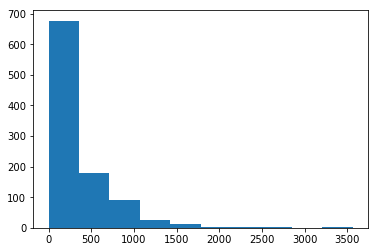

In [129]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt


def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimun:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)

total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)


We can see that the maximum value is way too huge for a week! So we need to debug the code

In [130]:
student_with_max_minutes = None
max_minutes = 0

for student,total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
        
max_minutes

3564.7332644989997

In [131]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

#### Lessons completed in first week

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimun: 0
Maximum: 36


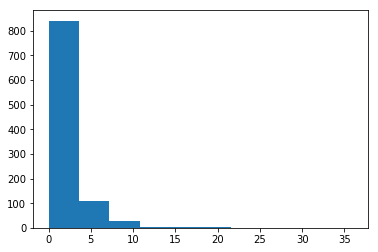

In [132]:
lessons_completed_by_account = sum_grouped_data(engagement_by_account, 'lessons_completed')
describe_data(lessons_completed_by_account.values())

#### Analysing num_of_courses visited

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimun: 0
Maximum: 7


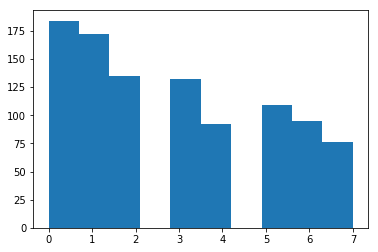

In [133]:
days_visited_by_account = sum_grouped_data(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

#### Splitting the engagement data(submission data) into two lists:
        1. Records for students who pass the subway project
        2. Records for students who do not pass the subway project

In [134]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project =set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and \
         (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
        
               
print len(pass_subway_project)
   

647


In [135]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


#### Comparing students who pass and who don't

Non passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimun: 0.0
Maximum: 1768.52274933


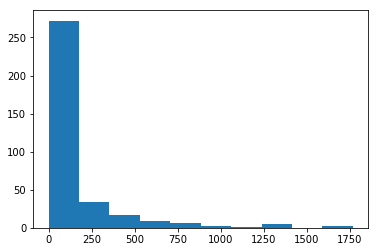

In [136]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')


print 'Non passing students:'
non_passing_minutes = sum_grouped_data(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())



Passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimun: 0.0
Maximum: 3564.7332645


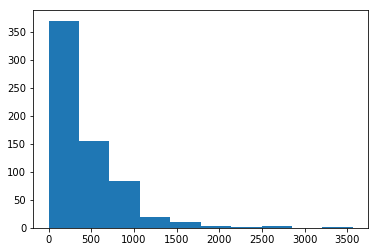

In [137]:
print 'Passing students:'
passing_minutes = sum_grouped_data(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())

Non passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimun: 0
Maximum: 27


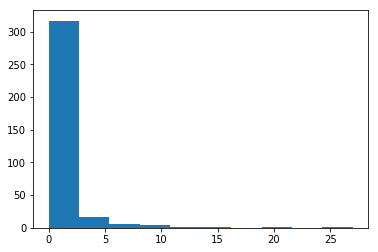

In [138]:
print 'Non passing students:'
non_passing_lessons = sum_grouped_data(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lessons.values())


Passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimun: 0
Maximum: 36


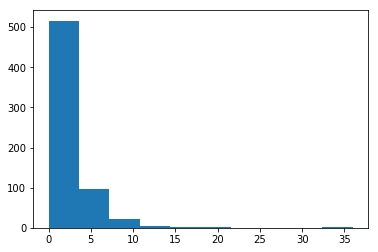

In [139]:
print 'Passing students:'
passing_lessons = sum_grouped_data(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lessons.values())

Non passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimun: 0
Maximum: 7


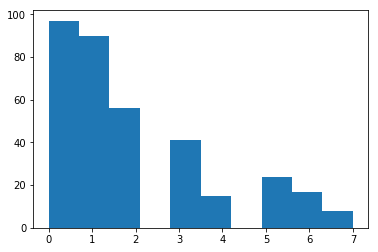

In [140]:
print 'Non passing students:'
non_passing_visits = sum_grouped_data(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())

Passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimun: 0
Maximum: 7


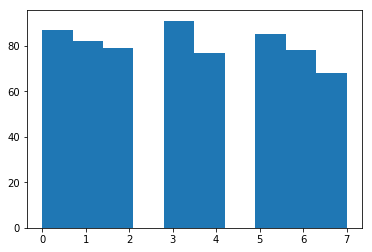

In [141]:
print 'Passing students:'
passing_visits = sum_grouped_data(passing_engagement_by_account, 'has_visited')
describe_data(passing_visits.values())

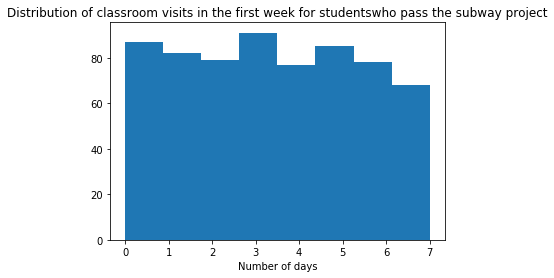

In [142]:
import seaborn as sns

plt.hist(passing_visits.values(), bins = 8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week for students' +
          'who pass the subway project' )

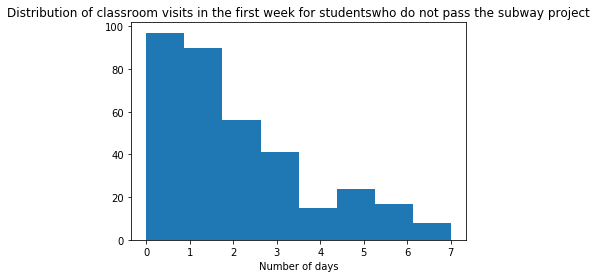

In [143]:
plt.hist(non_passing_visits.values(), bins = 8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week for students' +
          'who do not pass the subway project' )